In [1]:
# import
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from tensorflow.keras import models, layers

2024-08-11 11:33:33.939100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 11:33:33.939307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 11:33:34.121811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 1-Import des donnees

In [2]:
# importer la base de donnees MNIST
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# lien vers les dataset keras
#https://keras.io/api/datasets/

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

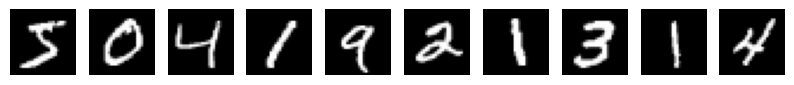

In [4]:
import matplotlib.pyplot as plt
# visualiser les donnees
plt.figure(figsize=(10,1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
plt.show()    

# 2-Pretraitement des donnees

In [5]:
#Normaliser les donnees
def Normalisation(x):
    return x/255.0

In [6]:
x_train.max()

255

In [7]:
x_train=Normalisation(x_train)
x_test=Normalisation(x_test)

In [8]:
x_train.max()

1.0

In [9]:
# tranformer les etiquettes en vecteurs binaires
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# 3-Modelisation

In [11]:
# construction du modele de RN
model=models.Sequential()

# Ajouter des couches
model.add(layers.Flatten(input_shape=(28,28)))# couche d'entree # applatir l'image passer de 28x28 a 748
model.add(layers.Dense(100,activation='relu'))# Premiere couche cachee avec 100 neurones
model.add(layers.Dense(50,activation='relu'))# Deuxieme couche cachee
model.add(layers.Dense(10,activation='softmax'))# couche de sortie avec la 10 neurones pour les 10 categories
                                                # et une fonction softmax car la classification n'est pas binaire

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# visualiser le reseau de neurone
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compiler l'ensemble d'element
# la foction de perte
# la metric a optimiser

model.compile(optimizer='adam',
              loss='categorical_crossentropy',# foction de pertes
             metrics=['accuracy']) # metric

In [14]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8549 - loss: 0.5024 - val_accuracy: 0.9567 - val_loss: 0.1517
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9625 - loss: 0.1271 - val_accuracy: 0.9651 - val_loss: 0.1166
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9741 - loss: 0.0854 - val_accuracy: 0.9651 - val_loss: 0.1117
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9638 - val_loss: 0.1173
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9728 - val_loss: 0.0913
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0389 - val_accuracy: 0.9738 - val_loss: 0.1005
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9738 - val_loss: 0.1054
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0266 - 

# 4-Evaluation du model

In [15]:
# Evaluation du model sur x_test, y_test
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'\n Test accuracy:{test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.1281

 Test accuracy:0.9768999814987183


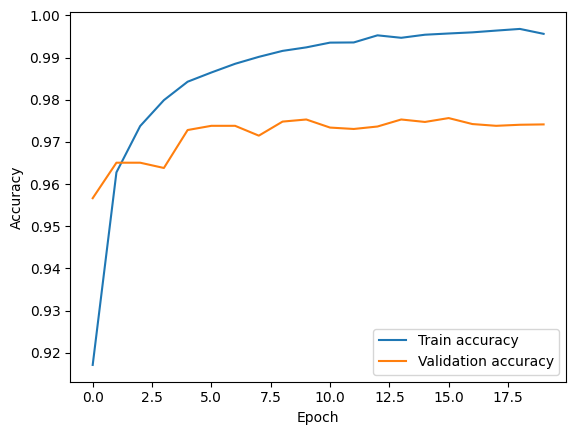

In [16]:
# Visualiser les performances de l'entrainement
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# cette visualisation est utile pour redefinir 
#le nombre d'epochs pour un bon entrainement

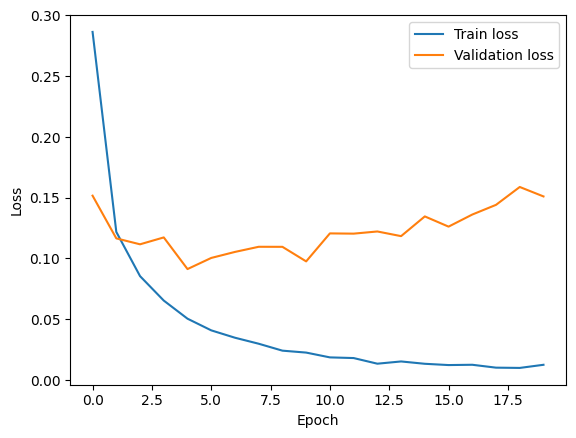

In [17]:
 # Visualiser les pertes de l'entrainement
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
 # cette visualisation est utile pour redefinir 
#le nombre d'epochs pour un bon entrainement


# 5- Faire des predictions

In [18]:
predictions=model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [19]:
# Afficher le resultat des predictions
predictions

array([[5.27858227e-16, 4.24316115e-15, 3.73567621e-10, 8.44938253e-09,
        2.58252088e-20, 4.16889203e-15, 2.85271415e-23, 9.99999940e-01,
        7.91029162e-15, 4.84093343e-09],
       [5.30797405e-19, 7.00492309e-15, 9.99999940e-01, 4.15355819e-15,
        1.11612088e-23, 1.88885663e-21, 1.41647794e-18, 1.34977833e-18,
        2.09480165e-17, 2.25837924e-23],
       [1.70781385e-13, 9.99995887e-01, 3.79009720e-07, 8.40300865e-14,
        2.20975471e-06, 2.11598924e-12, 7.51920921e-12, 1.42647718e-06,
        4.23384439e-09, 2.52472626e-10],
       [9.99999940e-01, 1.62121079e-15, 4.31626645e-15, 3.19612585e-19,
        4.70902614e-21, 3.34001334e-22, 1.47419799e-09, 6.55083317e-16,
        8.11882214e-22, 1.56621990e-16],
       [2.88604944e-19, 3.94226183e-13, 8.83765970e-18, 7.19630472e-23,
        9.99999940e-01, 9.36962666e-21, 2.42820420e-18, 2.34193006e-14,
        1.05716364e-19, 4.47385129e-10],
       [9.20583253e-16, 9.99993026e-01, 1.31350764e-09, 3.14662067e-14,
   

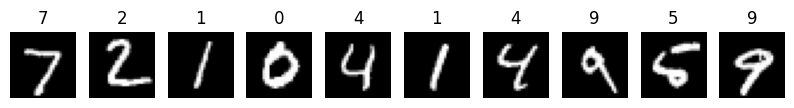

In [20]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()